# Geospatial Data with GeoPandas

Geopandas is a library built on pandas and matplotlib that is helpful for plotting static maps. 

Install `geopandas` if necessary:

In [8]:
!pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/94/8d/24f21e6a93ca418231aee3bddade7a0766c89c523832f29e08a8860f83e6/pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/92/39/ef6f06a5b223dbea308cfcbb7a0f72e7b506aef1850e061b2c73b0818715/pyproj-3.7.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/27/57/8ec7c62012bed06731f7ee979da7f207bbc4b27feed5f36680b6a70df54f/shapely-2.0.7-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   -------------------------------- ------- 266.2/323.6 kB 8.0 MB/s eta 0:00:01
  

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

Let's make a map of where the comic books stores are in the United States
* Data -- https://www.kaggle.com/datasets/thedevastator/u-s-comic-book-stores-geolocation

In [2]:
df_comics = pd.read_csv('us_comic_book_stores_geocoded.csv')
df_comics.head()

,index,comic_book_store_name,address,city,state,latitude,longitude
0,0,Albertville Candy Shop,118 E. Main St.,Albertville,AL,34.267369,-86.207686
1,1,All American Sports Cards and Comics,106 S. Water St.,Tuscumbia,AL,34.732331,-87.705093
2,2,All Star Comics & Cards,58 N. Main St.,Arab,AL,34.317467,-86.495688
3,3,Big Hit Sports Cards,6450 Hwy. 90 #L.,Spanish Fort,AL,30.721340,-87.865999
4,4,Bob's Comics,979 Gadsden Hwy.,Birmingham,AL,33.586211,-86.661340


State borders are defined in a `shape` file, found at https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

In [80]:
# Read into GeoPandas
gdf = gpd.read_file("cb_2018_us_state_500k/cb_2018_us_state_500k.shp")

gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


We can get an initial plot of the United States:
* Note the projection and coordinate system used

<Axes: >

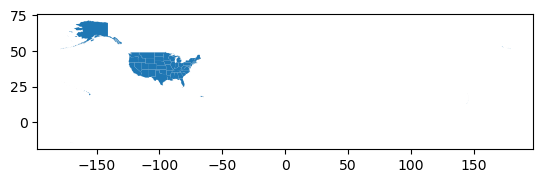

In [14]:
gdf.plot()

We can make edits using `pyplot` functions just as before:
* Say goodbye to Alaska and Hawaii

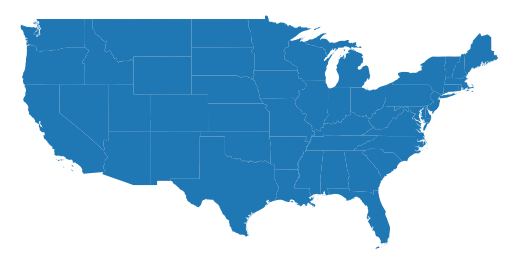

In [20]:
fig, ax = plt.subplots()
gdf.plot(ax = ax)

ax.set_xlim(-126, -66)
ax.set_ylim(24, 50)
ax.set_axis_off() # remove coordinates 

plt.show()

To make a **choropleth** map using the comic book store data, we will first count how many comic book stores there are per state. We will then add a new column to the geopandas data frame with the counts:

In [71]:
# Get number of comic stores per state 

state_counts = df_comics["state"].value_counts()
counts_df = pd.DataFrame({"STUSPS" : list(state_counts.keys()), "count" : list(state_counts)})
counts_df.head()

,STUSPS,count
0,CA,203
1,NY,167
2,TX,139
3,OH,130
4,IL,125


In [81]:
# Add state counts column to the GeoPandas data frame
gdf_merged = pd.merge(gdf, counts_df, on='STUSPS', how='left')
gdf_merged.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,count
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...",11.0
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",41.0
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6...",36.0
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",81.0
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,...",10.0


Now we can pass in the comic book store counts to create a "heat map" across states:

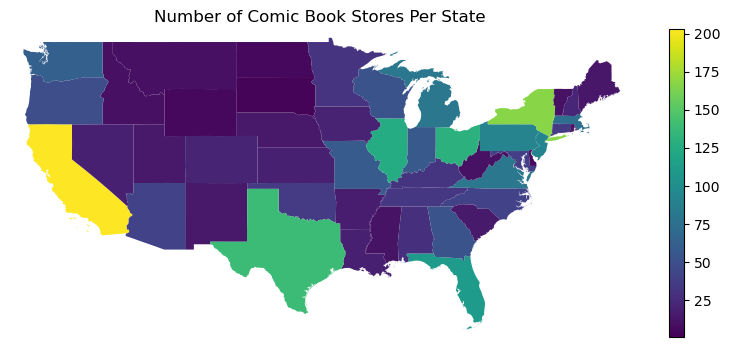

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
gdf_merged.plot(column="count", ax = ax, legend = True)

ax.set_xlim(-126, -66)
ax.set_ylim(24, 50)
ax.set_axis_off() # remove coordinates 

ax.set_title("Number of Comic Book Stores Per State")


plt.show()


The default colors are ugly, so we can edit the color scale:
* See https://matplotlib.org/stable/users/explain/colors/colormaps.html for options

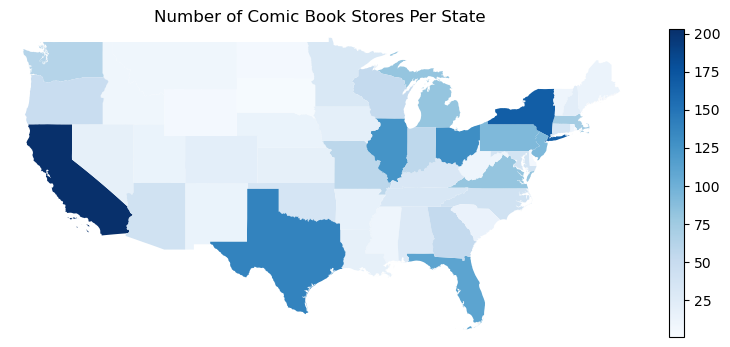

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
gdf_merged.plot(column="count", ax = ax, legend = True, cmap="Blues")

ax.set_xlim(-126, -66)
ax.set_ylim(24, 50)
ax.set_axis_off() # remove coordinates 

ax.set_title("Number of Comic Book Stores Per State")

plt.show()


If desired, we could also add the book store locations as a scatter plot:

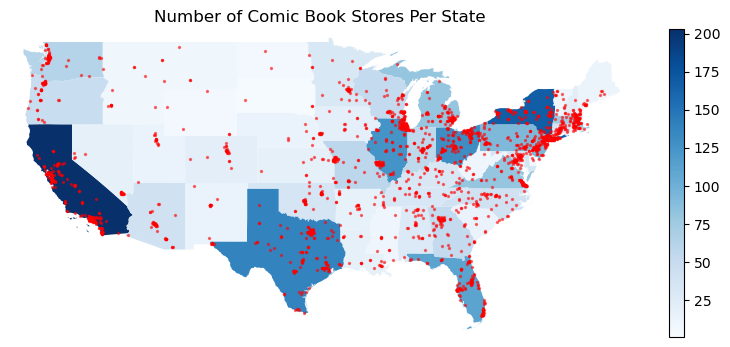

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))

gdf_merged.plot(column="count", ax = ax, legend = True, cmap="Blues")
ax.scatter(df_comics["longitude"], df_comics["latitude"], color="red", s=2, alpha=0.5)

ax.set_xlim(-126, -66)
ax.set_ylim(24, 50)
ax.set_axis_off() # remove coordinates 


ax.set_title("Number of Comic Book Stores Per State")

plt.show()

### Playing with Projections

Notice that the map is using the Mercator projection. In order to change projections, we can use Geopandas to project the coordinates defined in the shape file. 
* See https://geopandas.org/en/stable/docs/user_guide/projections.html

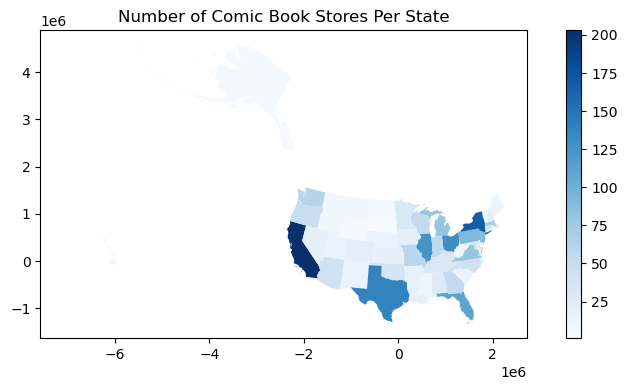

In [9]:
# Change to Albers projection
gdf_merged = gdf_merged.to_crs("ESRI:102003")

fig, ax = plt.subplots(figsize=(10, 4))
gdf_merged.plot(column="count", ax = ax, legend = True, cmap="Blues")

# ax.set_xlim(-126, -66)
# ax.set_ylim(24, 50)
# ax.set_axis_off() # remove coordinates 

ax.set_title("Number of Comic Book Stores Per State")

plt.show()



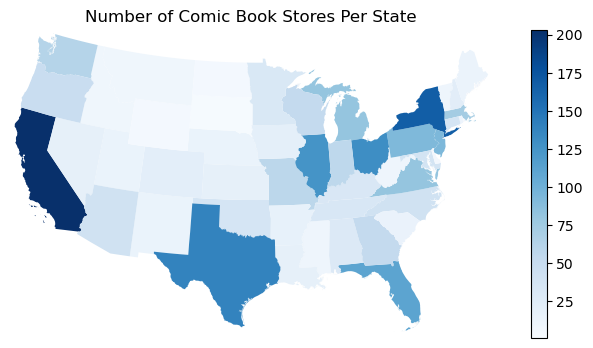

In [10]:
# Update boundaries

fig, ax = plt.subplots(figsize=(10, 4))
gdf_merged.plot(column="count", ax = ax, legend = True, cmap="Blues")

ax.set_xlim(-2.4 * 10**6, 2.3 * 10**6)
ax.set_ylim(-1.4 * 10**6, 1.6 * 10**6)
ax.set_axis_off() # remove coordinates 

ax.set_title("Number of Comic Book Stores Per State")

plt.show()



If desired, we can project the latitude and longitude coordinates in the comic store dataframe to include our scatter plot again:

In [21]:
# Create geopandas dataframe from comic book store coordinates
comics_gdf = gpd.GeoDataFrame(geometry = gpd.points_from_xy(df_comics.longitude, df_comics.latitude),
                             crs="EPSG:4326")

comics_gdf = comics_gdf.to_crs("ESRI:102003")

comics_gdf.head()

,geometry
0,POINT (893233.01 -315863.578)
1,POINT (752488.839 -277068.508)
2,POINT (866491.846 -312957.996)
3,POINT (776172.204 -724063.161)
4,POINT (859455.995 -395779.321)


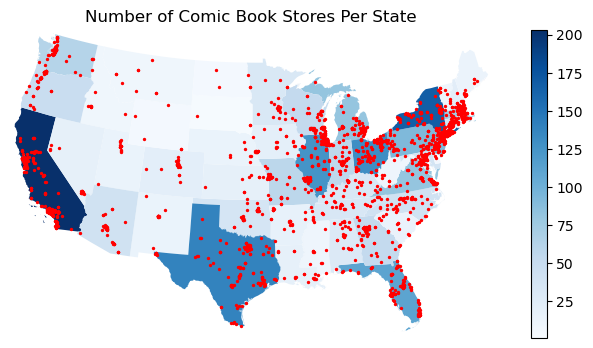

In [25]:
# Update boundaries

fig, ax = plt.subplots(figsize=(10, 4))
gdf_merged.plot(column="count", ax = ax, legend = True, cmap="Blues")
comics_gdf.plot(ax = ax, color = "red", marker = "o", markersize = 2)

ax.set_xlim(-2.4 * 10**6, 2.3 * 10**6)
ax.set_ylim(-1.4 * 10**6, 1.6 * 10**6)
ax.set_axis_off() # remove coordinates 

ax.set_title("Number of Comic Book Stores Per State")

plt.show()



### Playing with Bins

Wilke and Schwabish point out that choosing bin sizes for choropleth maps can be tricky. We can convert the bins from a continuous to a discrete scale if desired:

In [68]:
!pip install mapclassify

  Obtaining dependency information for mapclassify from https://files.pythonhosted.org/packages/e7/e9/d7531a07454927788642373ae253ad6dd8714fec375a789031418ecebf2d/mapclassify-2.8.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
   ---------------------------------- ----- 51.2/59.1 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 59.1/59.1 kB 1.6 MB/s eta 0:00:00


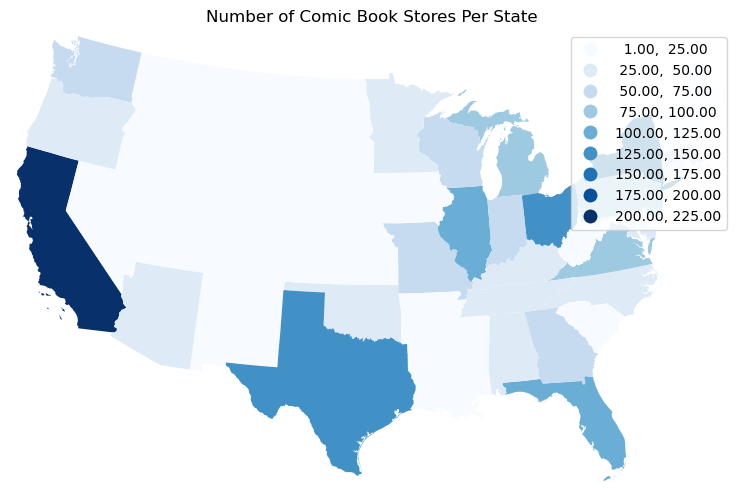

In [32]:
# Update boundaries

fig, ax = plt.subplots(figsize=(10, 6))
gdf_merged.plot(column="count", ax = ax, cmap="Blues", legend = True, 
                scheme='User_Defined',classification_kwds=dict(bins=list(range(25, 226, 25))))

ax.set_xlim(-2.4 * 10**6, 2.3 * 10**6)
ax.set_ylim(-1.4 * 10**6, 1.6 * 10**6)
ax.set_axis_off() # remove coordinates 



ax.set_title("Number of Comic Book Stores Per State")

plt.show()



Having the legend appear on top of the map is annoying, so we will make it scoot a bit:

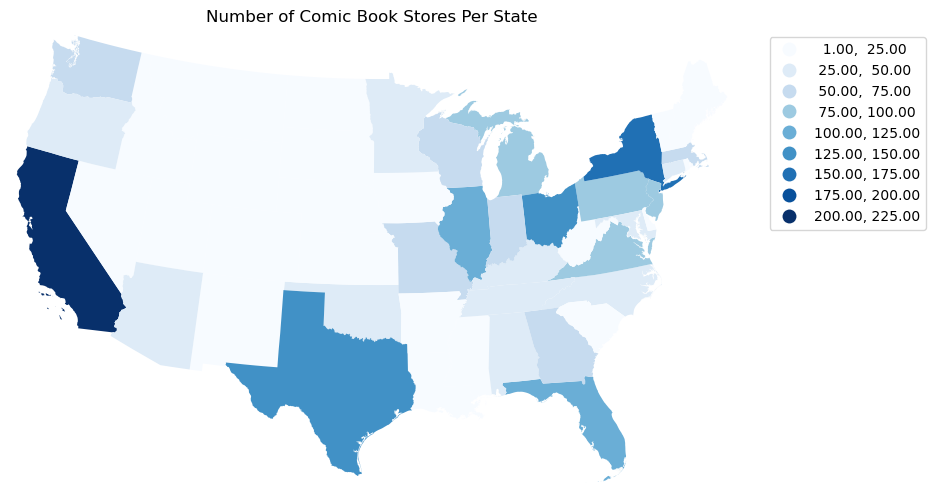

In [33]:
# Update boundaries

fig, ax = plt.subplots(figsize=(10, 6))
gdf_merged.plot(column="count", ax = ax, cmap="Blues", legend = True, 
                legend_kwds={'bbox_to_anchor': (1.04, 1), 'loc': 'upper left'},
                scheme='User_Defined',classification_kwds=dict(bins=list(range(25, 226, 25))))

ax.set_xlim(-2.4 * 10**6, 2.3 * 10**6)
ax.set_ylim(-1.4 * 10**6, 1.6 * 10**6)
ax.set_axis_off() # remove coordinates 



ax.set_title("Number of Comic Book Stores Per State")

plt.show()



Here's another bin setting that uses an exponential scale for non-equal bin sizes:

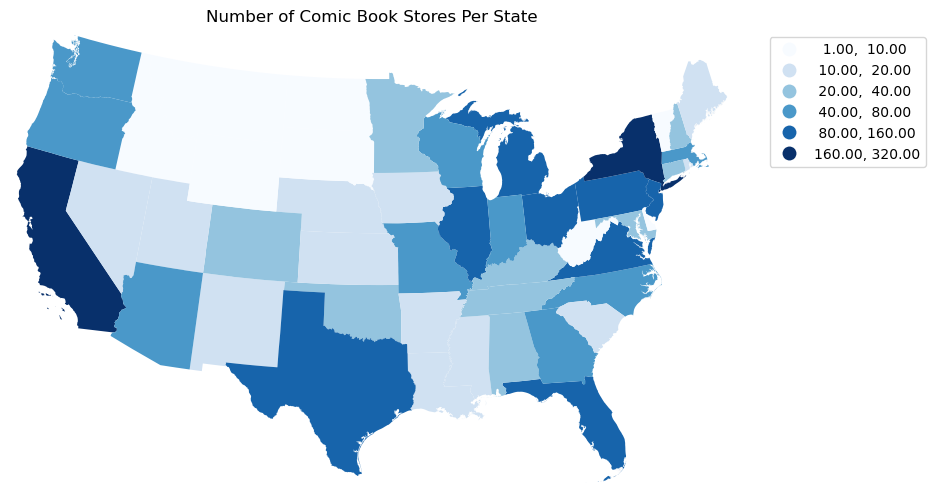

In [34]:
custom_bins = [10 * (2**i) for i in range(6)]

fig, ax = plt.subplots(figsize=(10, 6))
gdf_merged.plot(column="count", ax = ax, cmap="Blues", legend = True, 
                legend_kwds={'bbox_to_anchor': (1.04, 1), 'loc': 'upper left'},
                scheme='User_Defined',classification_kwds=dict(bins=custom_bins))

ax.set_xlim(-2.4 * 10**6, 2.3 * 10**6)
ax.set_ylim(-1.4 * 10**6, 1.6 * 10**6)
ax.set_axis_off() # remove coordinates 



ax.set_title("Number of Comic Book Stores Per State")

plt.show()



We can customize the text in the legend if needed:

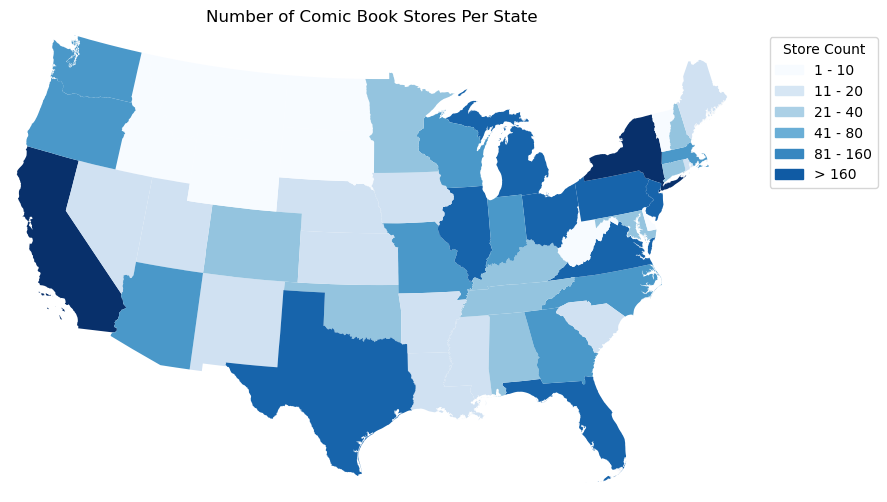

In [37]:
import matplotlib.patches as mpatches

custom_bins = [10 * (2**i) for i in range(6)]
bin_labels = ['1 - 10', '11 - 20', '21 - 40', '41 - 80', '81 - 160', '> 160']  # Custom labels for the bins

fig, ax = plt.subplots(figsize=(10, 6))
gdf_merged.plot(column="count", ax=ax, cmap="Blues", legend=False, 
                scheme='User_Defined', classification_kwds=dict(bins=custom_bins))

# Create custom legend
handles = [mpatches.Patch(color=plt.cm.Blues(i / len(custom_bins)), label=label) 
           for i, label in enumerate(bin_labels)]
ax.legend(handles=handles, bbox_to_anchor=(1.04, 1), loc='upper left', title='Store Count')

ax.set_xlim(-2.4 * 10**6, 2.3 * 10**6)
ax.set_ylim(-1.4 * 10**6, 1.6 * 10**6)
ax.set_axis_off()  # remove coordinates

ax.set_title("Number of Comic Book Stores Per State")

plt.show()

### Moving Shapes

So what if we actually wanted to include Alaska and Hawaii? We can apply transformations to their Geometry objects to place them as islands directly south of the 48 contiguous states (where the obviously belong):

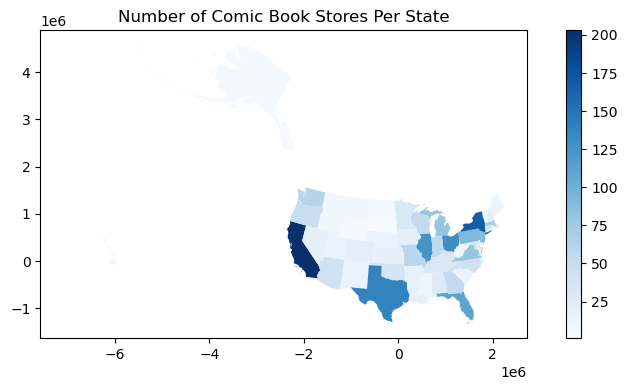

In [38]:
# Revisit old map

fig, ax = plt.subplots(figsize=(10, 4))
gdf_merged.plot(column="count", ax = ax, legend = True, cmap="Blues")

# ax.set_xlim(-126, -66)
# ax.set_ylim(24, 50)
# ax.set_axis_off() # remove coordinates 

ax.set_title("Number of Comic Book Stores Per State")

plt.show()

Let's make Alaska and Hawaii scoot:
* Use transformations defined in https://geopandas.org/en/stable/docs/user_guide/geometric_manipulations.html

In [116]:
# To reset values 
# Read into GeoPandas
gdf = gpd.read_file("cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
gdf_merged = pd.merge(gdf, counts_df, on='STUSPS', how='left')

gdf_merged = gdf_merged.to_crs("ESRI:102003")

gdf_merged.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,count
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((719952.837 -785108.098, 721081...",11.0
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((1799007.58 17387.012, 1799662....",41.0
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-620696.279 -86190.761, -620035.123 ...",36.0
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((1753262.513 222134.664, 175330...",81.0
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((1155315.949 156313.791, 1155325.846 ...",10.0


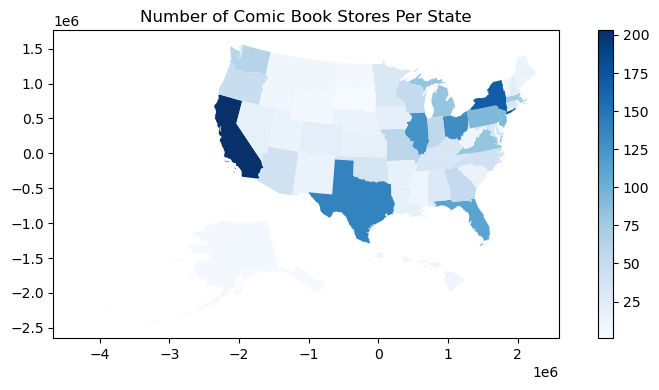

In [122]:
# All Together

gdf = gpd.read_file("cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
gdf_merged = pd.merge(gdf, counts_df, on='STUSPS', how='left')

gdf_merged = gdf_merged.to_crs("ESRI:102003")

alaska = gdf_merged[gdf_merged["STUSPS"] == "AK"]["geometry"]

new_alaska = alaska.scale(xfact=0.8, yfact=0.8)
new_alaska = new_alaska.rotate(40)
new_alaska = new_alaska.translate(xoff=1.5 * 10 **6, yoff=-5.5 * 10**6)

# Get index 
val = list(gdf_merged["STUSPS"]).index("AK")
gdf_merged.at[val, "geometry"] = new_alaska.iloc[0]

hawaii = gdf_merged[gdf_merged["STUSPS"] == "HI"]["geometry"]

new_hawaii = hawaii.scale(xfact=2.2, yfact=2.2)
new_hawaii = new_hawaii.rotate(50)
new_hawaii = new_hawaii.translate(xoff=5 * 10 **6, yoff=-2.2 * 10**6)

val = list(gdf_merged["STUSPS"]).index("HI")
gdf_merged.at[val, "geometry"] = new_hawaii.iloc[0]

# Revisit old map

fig, ax = plt.subplots(figsize=(10, 4))
gdf_merged.plot(column="count", ax = ax, legend = True, cmap="Blues")

# ax.set_xlim(-126, -66)
# ax.set_ylim(24, 50)
# ax.set_axis_off() # remove coordinates 

ax.set_title("Number of Comic Book Stores Per State")

plt.show()

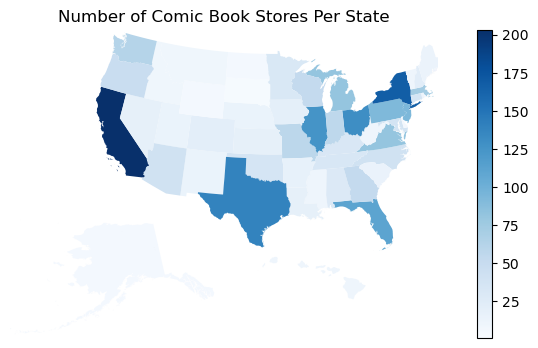

In [123]:
# Remove axis

fig, ax = plt.subplots(figsize=(10, 4))
gdf_merged.plot(column="count", ax = ax, legend = True, cmap="Blues")

ax.set_xlim(-3.5 * 10**6, 2.2 * 10**6)
ax.set_ylim(-2.5 * 10**6, 1.6 * 10**6)
ax.set_axis_off() # remove coordinates 

ax.set_title("Number of Comic Book Stores Per State")

plt.show()

If we wanted to plot the store locations for Alaska and Hawaii, we could apply similar transformations to their store location coordinates. 

### Playing with Counties

The comic book store data set just lists stores by city and state (along with their actual coordinates). We can use this information to look up the counties that each store resides in. Let's focus on making a map of comic book store locations in Utah:
* Retreive a new shape file for counties from https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

In [124]:
# Read into GeoPandas
gdf = gpd.read_file("cb_2018_us_county_500k/cb_2018_us_county_500k.shp")

gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.0463, -89.17938 37.0530..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.6454, -84.12483 37.6461..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


Let's filter out other states and just keep the counties for Utah:

In [136]:
gdf[gdf["NAME"] == "Utah"]

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
294,49,049,01448038,0500000US49049,49049,Utah,06,5189357942,364153797,"POLYGON ((-112.21323 40.45511, -112.2124 40.45..."


In [138]:
utah_counties = gdf[gdf["STATEFP"] == "49"]

utah_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
223,49,001,01448015,0500000US49001,49001,Beaver,06,6689681807,5298466,"POLYGON ((-114.05048 38.49996, -114.04983 38.5..."
224,49,003,01455966,0500000US49003,49003,Box Elder,06,14881016770,2547651536,"POLYGON ((-114.04255 41.21092, -114.0414 41.21..."
225,49,011,01448020,0500000US49011,49011,Davis,06,774500758,870693255,"POLYGON ((-112.45162 41.08733, -112.19934 41.1..."
291,49,029,01448028,0500000US49029,49029,Morgan,06,1577739393,4437369,"POLYGON ((-111.87463 41.17345, -111.87116 41.1..."
292,49,035,01448031,0500000US49035,49035,Salt Lake,06,1921943668,164903351,"POLYGON ((-112.26022 40.76909, -112.14827 40.8..."


<Axes: >

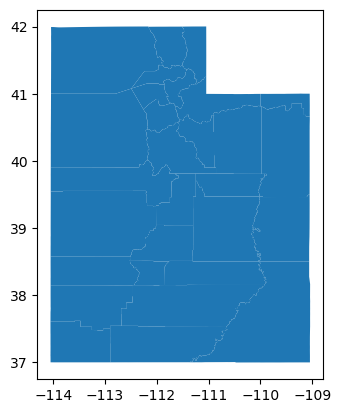

In [139]:
utah_counties.plot()

We can use our knowledge of the state of Utah (there aren't too many stores to classify), or an online tool to determine county by the given city and state. (We could also play around with the GPS coordinates if we wanted).

In [ ]:
!pip install geopy

In [140]:
from geopy.geocoders import Nominatim

def get_county(city_name, state_name):
    geolocator = Nominatim(user_agent="county_finder")
    location = geolocator.geocode(f"{city_name}, {state_name}")
    
    vals = str(location).split(",")
    for v in vals:
        if "County" in v:
            return v[:-7].strip() # slice off county   
        
utah_stores = df_comics.loc[df_comics['state'] == 'UT']
        
counties = []        
for i in range(len(utah_stores)):
    cur_city = utah_stores["city"].iloc[i]
    counties.append(get_county(cur_city, "UT"))
    
utah_stores["county"] = counties

C:\Users\10502190\AppData\Local\Temp\ipykernel_18208\1974874840.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  utah_stores["county"] = counties


In [141]:
utah_stores.head()

,index,comic_book_store_name,address,city,state,latitude,longitude,county
2013,2013,Black Cat Comics,2263 S. Highland Dr. (The Sugar House Center),Salt Lake City,UT,40.721843,-111.858299,Salt Lake
2014,2014,"Comics Plus, Inc.",1812 W. Sunset Blvd.,St. George,UT,37.124159,-113.622139,Washington
2015,2015,Dr. Volts Comics Connection,2023 E. 3300 S.,Salt Lake City,UT,40.699961,-111.833375,Salt Lake
2016,2016,Dragon's Keep Comic and Games,260 N. University Ave.,Provo,UT,40.237188,-111.658406,Utah
2017,2017,Edgemont Sports Cards,355 S. State St.,Orem,UT,40.290617,-111.691459,Utah


In [143]:
# Get number of comic stores per state 

county_counts = utah_stores["county"].value_counts()
counts_df = pd.DataFrame({"NAME" : list(county_counts.keys()), "count" : list(county_counts)})
counts_df.head()

,NAME,count
0,Salt Lake,7
1,Utah,3
2,Davis,2
3,Washington,1
4,Weber,1


In [147]:
# Add county counts to geodataframe

gdf_merged = pd.merge(utah_counties, counts_df, on='NAME', how='left')
gdf_merged["count"].fillna(0, inplace=True)
gdf_merged.head()


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,count
0,49,001,01448015,0500000US49001,49001,Beaver,06,6689681807,5298466,"POLYGON ((-114.05048 38.49996, -114.04983 38.5...",0.0
1,49,003,01455966,0500000US49003,49003,Box Elder,06,14881016770,2547651536,"POLYGON ((-114.04255 41.21092, -114.0414 41.21...",0.0
2,49,011,01448020,0500000US49011,49011,Davis,06,774500758,870693255,"POLYGON ((-112.45162 41.08733, -112.19934 41.1...",2.0
3,49,029,01448028,0500000US49029,49029,Morgan,06,1577739393,4437369,"POLYGON ((-111.87463 41.17345, -111.87116 41.1...",0.0
4,49,035,01448031,0500000US49035,49035,Salt Lake,06,1921943668,164903351,"POLYGON ((-112.26022 40.76909, -112.14827 40.8...",7.0


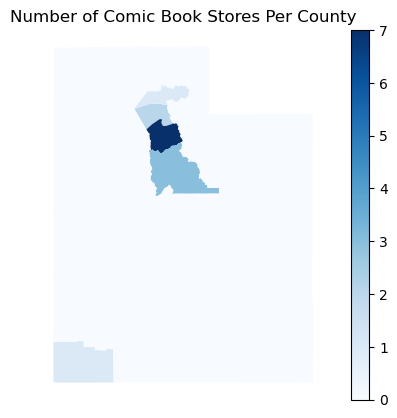

In [149]:
# Plot county choropleth 

fig, ax = plt.subplots()
gdf_merged.plot(column="count", ax = ax, legend = True, cmap="Blues")


# ax.set_xlim(-126, -66)
# ax.set_ylim(24, 50)
ax.set_axis_off() # remove coordinates 

ax.set_title("Number of Comic Book Stores Per County")

plt.show()

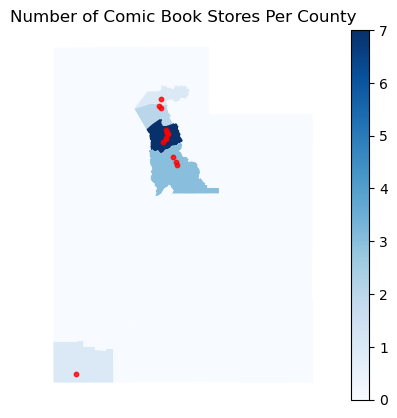

In [152]:
# Plot county choropleth 

fig, ax = plt.subplots()
gdf_merged.plot(column="count", ax = ax, legend = True, cmap="Blues")

ax.scatter(utah_stores["longitude"], utah_stores["latitude"], color="red", s=10, alpha=0.8)


# ax.set_xlim(-126, -66)
# ax.set_ylim(24, 50)
ax.set_axis_off() # remove coordinates 

ax.set_title("Number of Comic Book Stores Per County")

plt.show()